In [1]:
import numpy as np
import pandas  as pd

In [2]:
#conda install scikit-learn

In [3]:
from sklearn import preprocessing

In [4]:
df = pd.read_csv('spam.csv')

In [5]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

#### 1. Data cleaning
#### 2. EDA
#### 3. Text Preprocessing
#### 4. Model building
#### 5. Evaluation
#### 6. Improvement
#### 7. Website
#### 8. Deploy

# 1. Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head(5)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
le = preprocessing.LabelEncoder()

In [12]:
df['target'] = le.fit_transform(df['target']) #le.fit_transform(df['target'])

In [13]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [15]:
# check for duplicate values
df.duplicated().sum()

403

In [16]:
# remove duplicates
df = df.drop_duplicates(keep='first')


In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

# 2.EDA 

In [19]:
df.head() #df['target'].value_counts

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

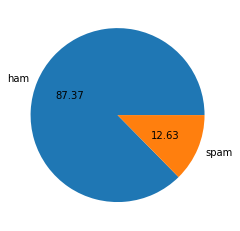

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
# Data is imbalanced

In [23]:
import nltk

In [24]:
#!pip install nltk

In [25]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [26]:
df['num_characters'] = df['text'].apply(len)  #df['text'].apply(len)

In [27]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x))) #remove length and check

In [29]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [30]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x))) #remove len and check

In [31]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [32]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.923776,18.456375,1.962275
std,58.174846,13.323322,1.433892
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe() #0 for ham

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.456820,17.123339,1.815545
std,56.356802,13.491315,1.364098
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
#spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe() #1for spam

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.977029
std,30.014336,7.011513,1.493676
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [35]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

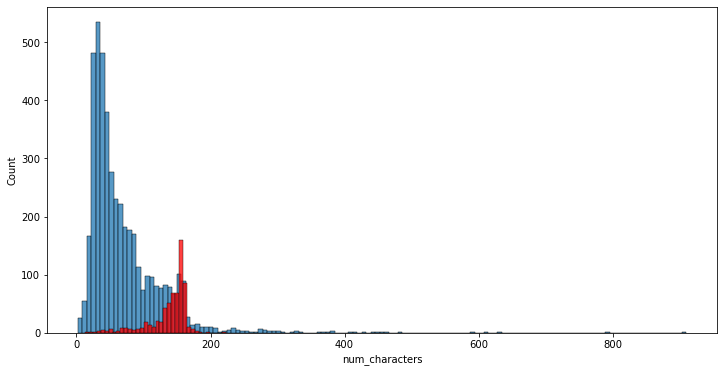

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

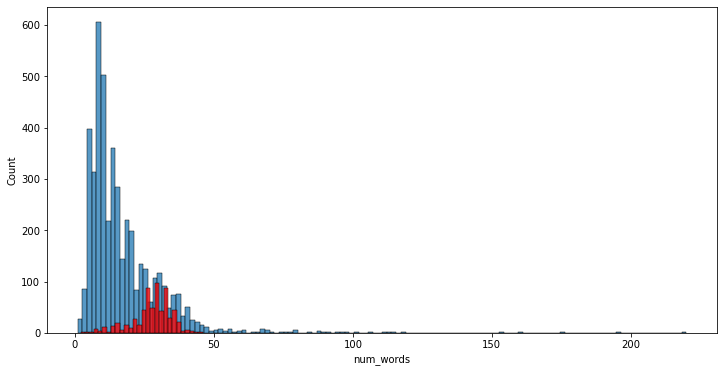

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

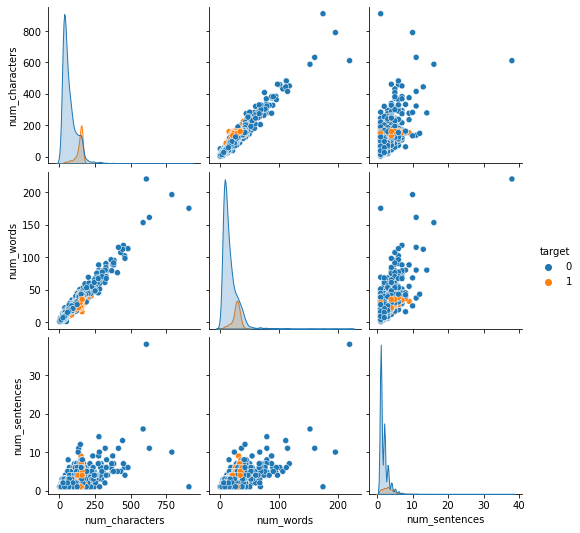

In [38]:
sns.pairplot(df,hue='target') #outlier is available in data lets check corr

<AxesSubplot:>

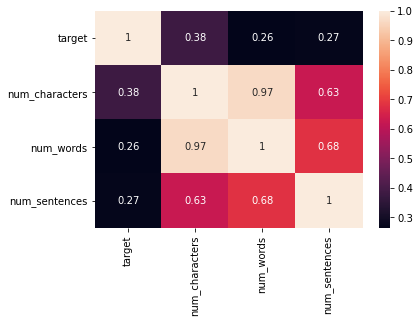

In [39]:
sns.heatmap(df.corr(),annot=True)

# 3. Data Preprocessing
###    Lower case
###   Tokenization
###    Removing special characters
###    Removing stop words and punctuation
###    Stemming

In [40]:
def transform_text(text):
    text = text.lower() #lower case
    text = nltk.word_tokenize(text) #tokenize with return y
    
    y = []        #remove special character with loop return y
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]   #remove stop words & punc with this loop & [:] is cumplsry to read #re assign loop and clear y output
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]   #stemmig loop & re assign loop and clear y output
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [48]:
transform_text('I loved the YT lectures on Machine Learning. How about you?')

'love yt lectur machin learn'

In [43]:
#from nltk.corpus import stopwords
#stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [45]:
#import string 
#string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [49]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [50]:
df['transformed_text'] = df['text'].apply(transform_text)

In [51]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
#!pip install wordcloud

In [53]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [54]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

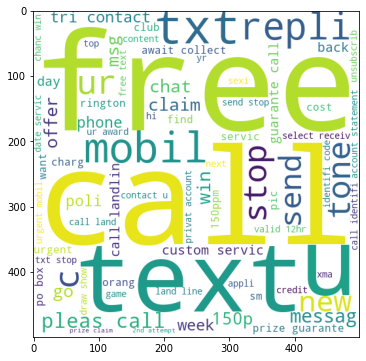

In [55]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [56]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))

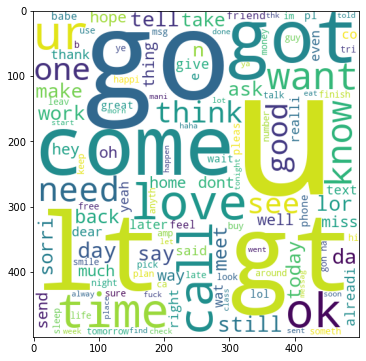

In [57]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [58]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [59]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [60]:
len(spam_corpus)

9941

In [61]:
#from collections import Counter
#Counter(spam_corpus).most_common(30) this give u  top 30 most occur words then add into data frame like this code:pd.DataFrame(Counter(spam_corpus).most_common(30)

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


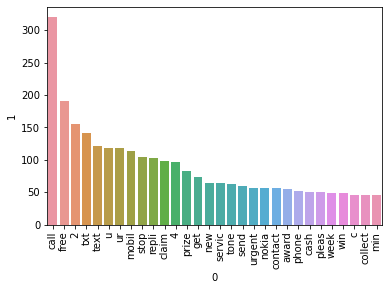

In [62]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [63]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [64]:
len(ham_corpus)

35303

C:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


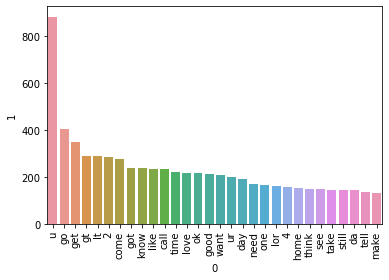

In [65]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [66]:
# Text Vectorization
# using Bag of Words
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


# 4. Model Building

In [412]:
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000) # I tried with all the features like 1000,1500,2000,3000,best result get by 3000

In [413]:
X = tfidf.fit_transform(df['transformed_text']).toarray()  #tfidf,cv.fit

In [414]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [415]:
#appending the num_character col to X
#X = np.hstack((X,df['num_characters'].values.reshape(-1,1)))

In [416]:
X.shape

(5169, 3000)

In [417]:
y = df['target'].values

In [418]:
from sklearn.model_selection import train_test_split

In [419]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=27)

In [420]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [399]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [400]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8549323017408124
[[777 131]
 [ 19 107]]
0.4495798319327731


In [421]:
mnb.fit(X_train,y_train) #we choose this cause our data is inbalanced and precission matter and hhere we get accurate 100% precission so this is good as compare to bow ,tf-df is besst
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9777562862669246
[[907   1]
 [ 22 104]]
0.9904761904761905


In [402]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9796905222437138
[[907   1]
 [ 20 106]]
0.9906542056074766


In [403]:
# tfidf --> MNB  best precission here

In [404]:
#!pip install xgboost

In [405]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [406]:
svc = SVC(kernel='sigmoid', gamma=1.0)
#knc = KNeighborsClassifier()mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [407]:
clfs = {
    'SVC' : svc,
    #'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [408]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [409]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.97678916827853, 0.9636363636363636)

In [410]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.97678916827853
Precision -  0.9636363636363636
For  NB
Accuracy -  0.9777562862669246
Precision -  0.9904761904761905
For  DT
Accuracy -  0.9400386847195358
Precision -  0.8333333333333334
For  LR
Accuracy -  0.9526112185686654
Precision -  0.9139784946236559
For  RF
Accuracy -  0.9738878143133463
Precision -  0.9714285714285714
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9047619047619048
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8373983739837398
For  ETC
Accuracy -  0.9738878143133463
Precision -  0.9714285714285714
For  GBDT
Accuracy -  0.9497098646034816
Precision -  0.9404761904761905
For  xgb
Accuracy -  0.9738878143133463
Precision -  0.9380530973451328


In [411]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [373]:
performance_df

,Algorithm,Accuracy,Precision
1,NB,0.948743,0.986667
4,RF,0.974855,0.971698
7,ETC,0.973888,0.971429
9,xgb,0.972921,0.922414
8,GBDT,0.957447,0.918367
3,LR,0.955513,0.908163
6,BgC,0.968085,0.884298
2,DT,0.951644,0.858491
5,AdaBoost,0.956480,0.824000
0,SVC,0.878143,0.000000


In [374]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [375]:
performance_df1

,Algorithm,variable,value
0,NB,Accuracy,0.948743
1,RF,Accuracy,0.974855
2,ETC,Accuracy,0.973888
3,xgb,Accuracy,0.972921
4,GBDT,Accuracy,0.957447
5,LR,Accuracy,0.955513
6,BgC,Accuracy,0.968085
7,DT,Accuracy,0.951644
8,AdaBoost,Accuracy,0.956480
9,SVC,Accuracy,0.878143


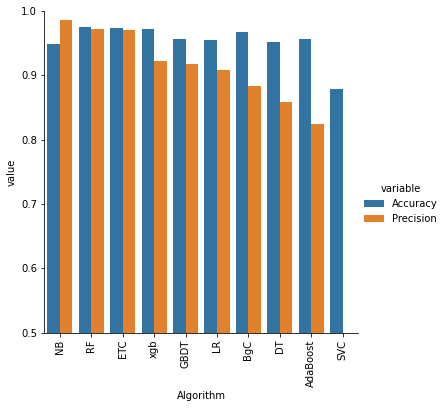

In [376]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [377]:
# model improve
# 1. Change the max_features parameter of TfIdf

In [347]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)#1ststeprun

In [348]:
#temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [316]:
#new_df = performance_df.merge(temp_df,on='Algorithm') #1ststep

In [317]:
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,NB,0.977756,0.990476,0.977756,0.990476
1,RF,0.973888,0.971429,0.973888,0.971429
2,ETC,0.973888,0.971429,0.973888,0.971429
3,SVC,0.976789,0.963636,0.976789,0.963636
4,GBDT,0.949710,0.940476,0.949710,0.940476
5,xgb,0.973888,0.938053,0.973888,0.938053
6,LR,0.952611,0.913978,0.952611,0.913978
7,AdaBoost,0.960348,0.904762,0.960348,0.904762
8,BgC,0.958414,0.837398,0.958414,0.837398
9,DT,0.939072,0.818182,0.939072,0.818182


In [349]:
#new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [350]:
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,NB,0.977756,0.990476,0.977756,0.990476,0.978723,0.940678
1,RF,0.973888,0.971429,0.973888,0.971429,0.973888,0.971429
2,ETC,0.973888,0.971429,0.973888,0.971429,0.973888,0.971429
3,SVC,0.976789,0.963636,0.976789,0.963636,0.970986,0.928571
4,GBDT,0.949710,0.940476,0.949710,0.940476,0.949710,0.940476
5,xgb,0.973888,0.938053,0.973888,0.938053,0.973888,0.938053
6,LR,0.952611,0.913978,0.952611,0.913978,0.964217,0.958763
7,AdaBoost,0.960348,0.904762,0.960348,0.904762,0.960348,0.904762
8,BgC,0.958414,0.837398,0.958414,0.837398,0.958414,0.837398
9,DT,0.939072,0.818182,0.939072,0.818182,0.940039,0.833333


In [378]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [379]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling,Accuracy_num_chars,Precision_num_chars
0,NB,0.977756,0.990476,0.977756,0.990476,0.978723,0.940678,0.948743,0.986667
1,RF,0.973888,0.971429,0.973888,0.971429,0.973888,0.971429,0.974855,0.971698
2,ETC,0.973888,0.971429,0.973888,0.971429,0.973888,0.971429,0.973888,0.971429
3,SVC,0.976789,0.963636,0.976789,0.963636,0.970986,0.928571,0.878143,0.000000
4,GBDT,0.949710,0.940476,0.949710,0.940476,0.949710,0.940476,0.957447,0.918367
5,xgb,0.973888,0.938053,0.973888,0.938053,0.973888,0.938053,0.972921,0.922414
6,LR,0.952611,0.913978,0.952611,0.913978,0.964217,0.958763,0.955513,0.908163
7,AdaBoost,0.960348,0.904762,0.960348,0.904762,0.960348,0.904762,0.956480,0.824000
8,BgC,0.958414,0.837398,0.958414,0.837398,0.958414,0.837398,0.968085,0.884298
9,DT,0.939072,0.818182,0.939072,0.818182,0.940039,0.833333,0.951644,0.858491


In [380]:
from sklearn.ensemble import VotingClassifier

In [382]:
#Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [383]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [384]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [385]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9458413926499033
Precision 1.0


In [386]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [387]:
from sklearn.ensemble import StackingClassifier

In [388]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [389]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9700193423597679
Precision 0.88


In [422]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))